# Creditworthiness Prediction using Random Forest
Dataset: German Credit Data (Numeric)
Author: Deepak Asija

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

In [48]:
df = pd.read_csv("cleaned_german_credit_data.csv")

In [50]:
print(df.head())
print("Dataset shape:", df.shape)
print("Class distribution:", df['Creditworthiness'].value_counts())

   Attr1  Attr2  Attr3  Attr4  Attr5  Attr6  Attr7  Attr8  Attr9  Attr10  ...  \
0      6      4     12      5      5      3      4      1     67       3  ...   
1     48      2     60      1      3      2      2      1     22       3  ...   
2     12      4     21      1      4      3      3      1     49       3  ...   
3     42      2     79      1      4      3      4      2     45       3  ...   
4     24      3     49      1      3      3      4      4     53       3  ...   

   Attr15  Attr16  Attr17  Attr18  Attr19  Attr20  Attr21  Attr22  Attr23  \
0       0       0       1       0       0       1       0       0       1   
1       0       0       1       0       0       1       0       0       1   
2       0       0       1       0       0       1       0       1       0   
3       0       0       0       0       0       0       0       0       1   
4       1       0       1       0       0       0       0       0       1   

   Creditworthiness  
0                 1  
1     

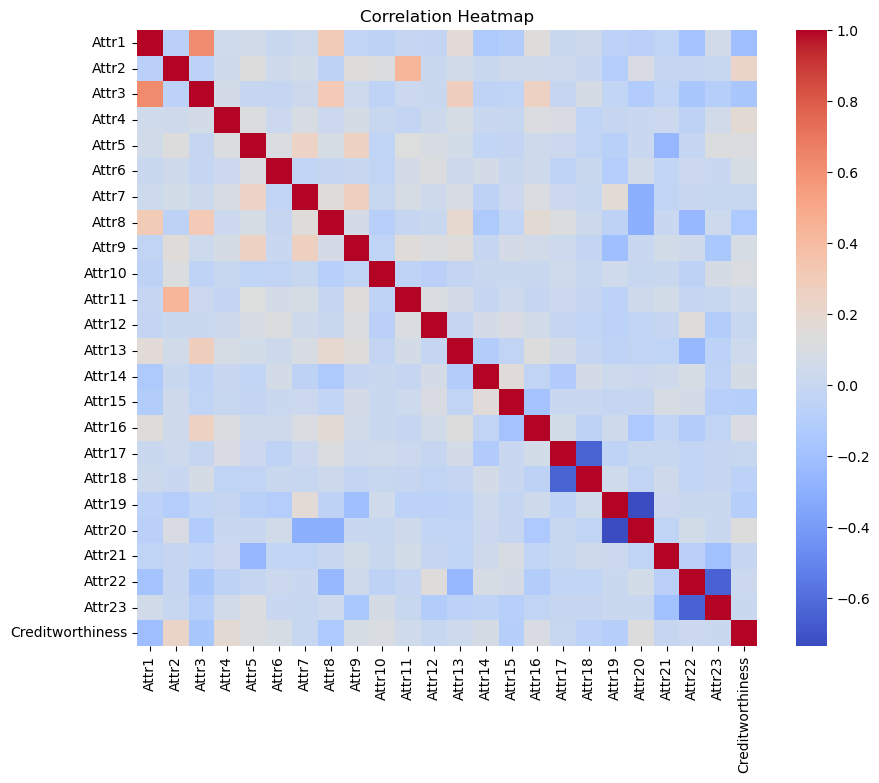

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [54]:
X = df.drop('Creditworthiness', axis=1)
y = df['Creditworthiness']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.745
Confusion Matrix:
 [[ 22  37]
 [ 14 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.37      0.46        59
           1       0.77      0.90      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.73      0.74      0.72       200



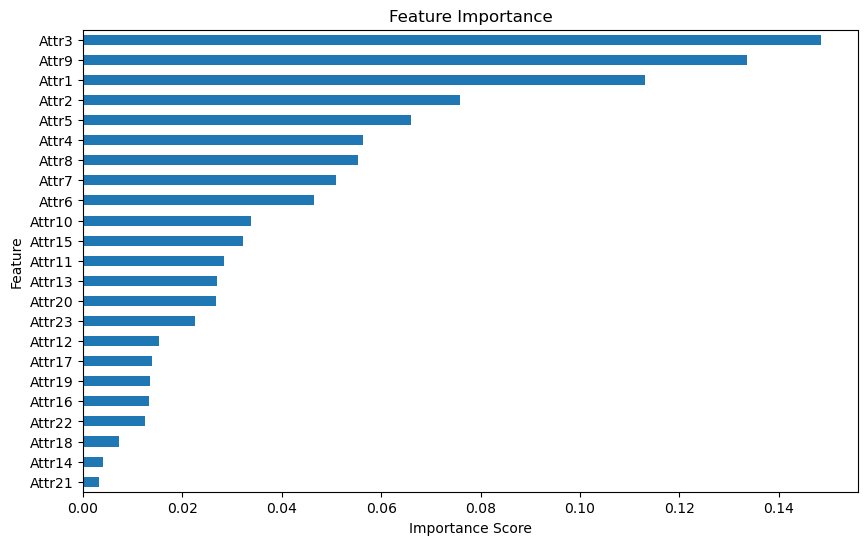

In [62]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

📊 ROC AUC Score: 0.7603077292943864


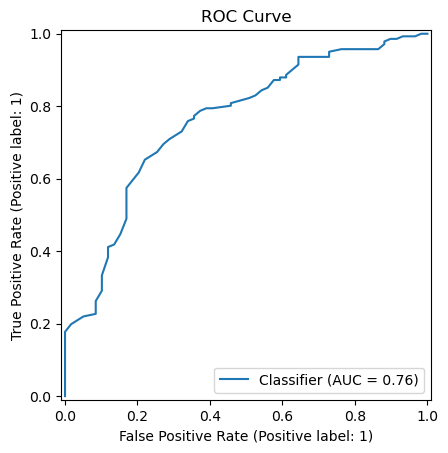

In [64]:
y_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("📊 ROC AUC Score:", roc_auc)

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()

##              🎉Project Complete🎉